In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy.interpolate as sci
from scipy import signal
from datetime import datetime, timedelta

In [2]:
%matplotlib nbagg

In [3]:
epoch = datetime(1, 1, 1)

## Hour Resolution Data

In [4]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [5]:
longitudes = all_hour[0][1:]
latitudes = all_hour[1][1:]

coordinates = []

for i in range(len(longitudes)):
    a = "(" + str(round(latitudes[i],3)) + "\u00B0N, " + str(round(longitudes[i], 3)) + "\u00B0E)"
    coordinates.append(a)

In [6]:
all_hour_reshaped = np.transpose(all_hour[3:])

In [7]:
hour_times = all_hour_reshaped[0]
all_hour_stations = all_hour_reshaped[1:]

The below code is for the big color plot. Please skip it when repeatedly running code.

In [8]:
hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in hour_times]

In [9]:
hourdatelist = []
hourxlocdate = []
for i in range(1, 6):
    hourdatelist.append(str(hour_time_pretty[int(i*len(hour_times)/6)].year))
    hourxlocdate.append(i*1.3*len(coordinates)/6)

<IPython.core.display.Javascript object>


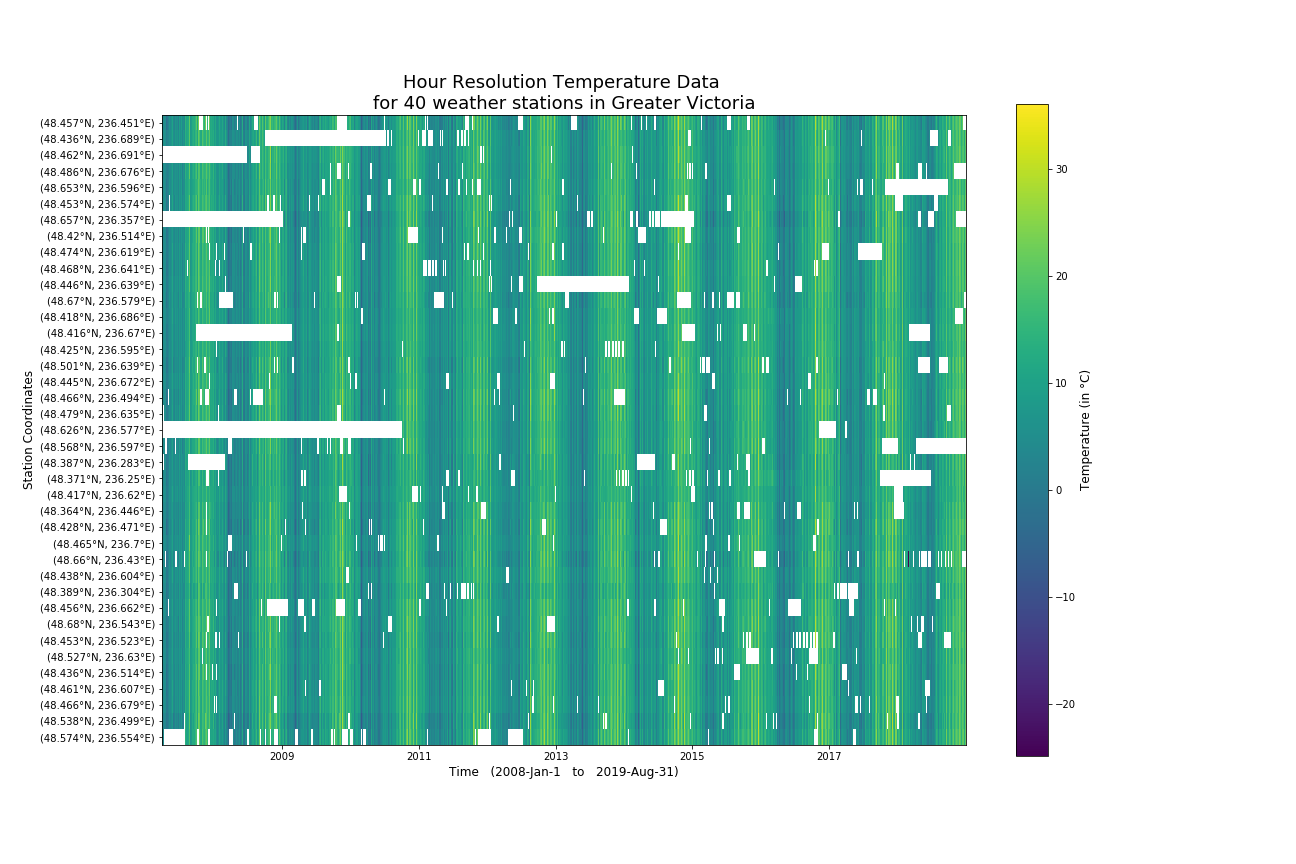

In [10]:
plt.close()

#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

plt.figure(figsize=(18, 12))
plt.imshow(all_hour_stations, extent=(1, 1.3*len(coordinates), 0, len(coordinates)), interpolation='nearest', origin='lower', cmap='viridis')
plt.xlabel('Time   (2008-Jan-1   to   2019-Aug-31)')
plt.xticks(ticks=hourxlocdate, labels=hourdatelist)
plt.yticks(np.array(range(1, len(coordinates) + 1)) - 0.5, coordinates)
plt.ylabel('Station Coordinates')
plt.title("Hour Resolution Temperature Data \nfor 40 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [11]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawHourData.eps")
plt.close()

Run code from here.

In [12]:
coastline_coordinates = np.loadtxt("Data/Coastline.dat")

In [13]:
coastline_coordinates = np.transpose(coastline_coordinates)

In [14]:
station_loc_x = 110*np.cos(np.pi*latitudes/180)*(longitudes - 360)
station_loc_y = 110*latitudes

In [15]:
coast_loc_x = 110*np.cos(np.pi*coastline_coordinates[1]/180)*coastline_coordinates[0]
coast_loc_y = 110*coastline_coordinates[1]

In [16]:
scale_factor = np.cos(np.pi*latitudes[10]/180)

<IPython.core.display.Javascript object>


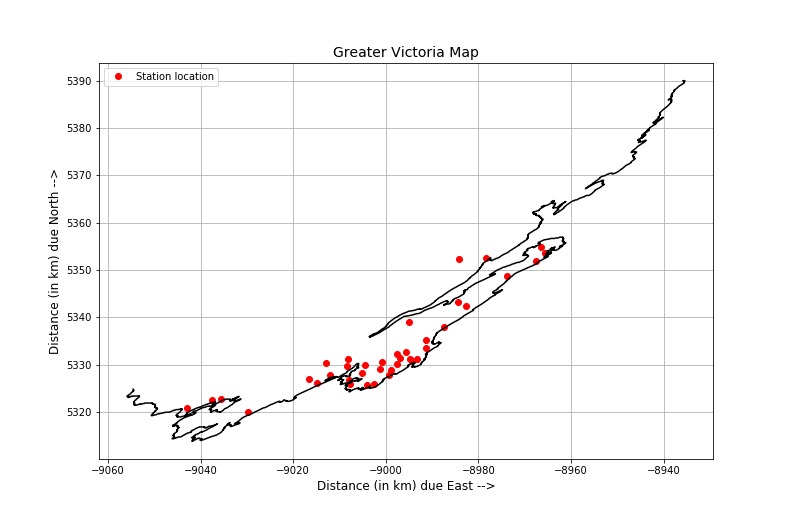

In [17]:
plt.close()

plt.rc('axes', titlesize=14)

plt.figure(figsize=(11, 11*scale_factor))
plt.plot(station_loc_x, station_loc_y, 'ro', label="Station location")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
plt.grid(True)
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Greater Victoria Map")
plt.legend()

In [18]:
#plt.savefig("/home/jupyter/Phys-411-final-project/Images/GreaterVictoriaMap.eps")
plt.close()

In [19]:
x_gridline = np.linspace(min(station_loc_x), max(station_loc_x), 50)
y_gridline = np.linspace(min(station_loc_y), max(station_loc_y), int(50*scale_factor))

x_grid, y_grid = np.meshgrid(x_gridline, y_gridline)

<IPython.core.display.Javascript object>


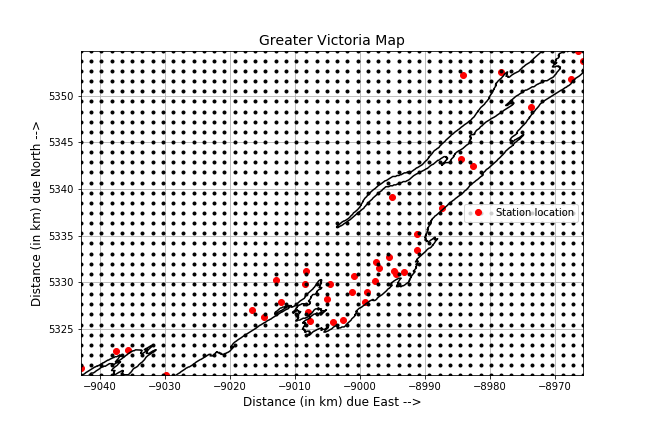

In [20]:
plt.close()

plt.figure(figsize=(9, 9*scale_factor))
plt.plot(station_loc_x, station_loc_y, 'ro', label="Station location")
plt.plot(coast_loc_x, coast_loc_y, 'k-')
plt.plot(x_grid, y_grid, 'k.')
plt.xlim(min(x_gridline), max(x_gridline))
plt.ylim(min(y_gridline), max(y_gridline))
plt.grid(True)
plt.xlabel("Distance (in km) due East -->")
plt.ylabel("Distance (in km) due North -->")
plt.title("Greater Victoria Map")
plt.legend()

In [21]:
plt.close()

## Minute Resolution Data

In [4]:
uvic_sci = np.loadtxt("Data/AllStations_temperature_minute_data_2019/UVicSci_temperature_2019.dat")

In [5]:
james_bay = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JamesBay_temperature_2019.dat")

In [6]:
deep_cove = np.loadtxt("Data/AllStations_temperature_minute_data_2019/DeepCove_temperature_2019.dat")

In [7]:
john_muir = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JohnMuir_temperature_2019.dat")

In [8]:
keating = np.loadtxt("Data/AllStations_temperature_minute_data_2019/Keating_temperature_2019.dat")

In [9]:
helgesen = np.loadtxt("Data/AllStations_temperature_minute_data_2019/Helgesen_temperature_2019.dat")

In [10]:
discovery_elementary = np.loadtxt("Data/AllStations_temperature_minute_data_2019/DiscoveryElementary_temperature_2019.dat")

In [11]:
min_times = np.linspace(uvic_sci[0], uvic_sci[1], uvic_sci[2])

In [12]:
uvic_sci_min = uvic_sci[3:]
james_bay_min = james_bay[3:]
john_muir_min = john_muir[3:]
deep_cove_min = deep_cove[3:]
keating_min = keating[3:]
helgesen_min = helgesen[3:]
discovery_elementary_min = discovery_elementary[3:]

The below code is for the big color plot. Please skip it when repeatedly running code.

In [14]:
min_time_pretty = [epoch + timedelta(days=y-367.0) for y in min_times]

In [15]:
all_min_stations = np.ndarray((7, len(uvic_sci_min)))

In [16]:
all_min_stations[0] = uvic_sci_min #48.462N, 236.691E
all_min_stations[1] = james_bay_min #48.417N, 236.62E
all_min_stations[2] = john_muir_min #48.371N, 236.25E
all_min_stations[3] = deep_cove_min #48.68N, 236.543E
all_min_stations[4] = keating_min #48.568N, 236.597E
all_min_stations[5] = helgesen_min #48.364N, 236.446E
all_min_stations[6] = discovery_elementary_min #48.652N, 236.649E

In [17]:
mindatelist = []
minxlocdate = []
for i in range(1, 6):
    mindatelist.append(str(min_time_pretty[int(i*len(min_times)/6)].year))
    minxlocdate.append(i*1.3*40/6)

In [18]:
minnamelist = ["UVic Science Bldg.\n(48.462\u00B0N, 236.691\u00B0E)", "James Bay\n(48.417\u00B0N, 236.62\u00B0E)", "John Muir\n(48.371\u00B0N, 236.25\u00B0E)", "Deep Cove\n(48.68\u00B0N, 236.543\u00B0E)", "Keating\n(48.568\u00B0N, 236.597\u00B0E)", "Helgesen Elementary\n(48.364\u00B0N, 236.446\u00B0E)", "Discovery Elementary\n(48.652\u00B0N, 236.649\u00B0E)"]

In [22]:
minylocname = []
for i in range(1, 8):
    minylocname.append(i*0.5*40/7 - 0.5*40/18)

<IPython.core.display.Javascript object>


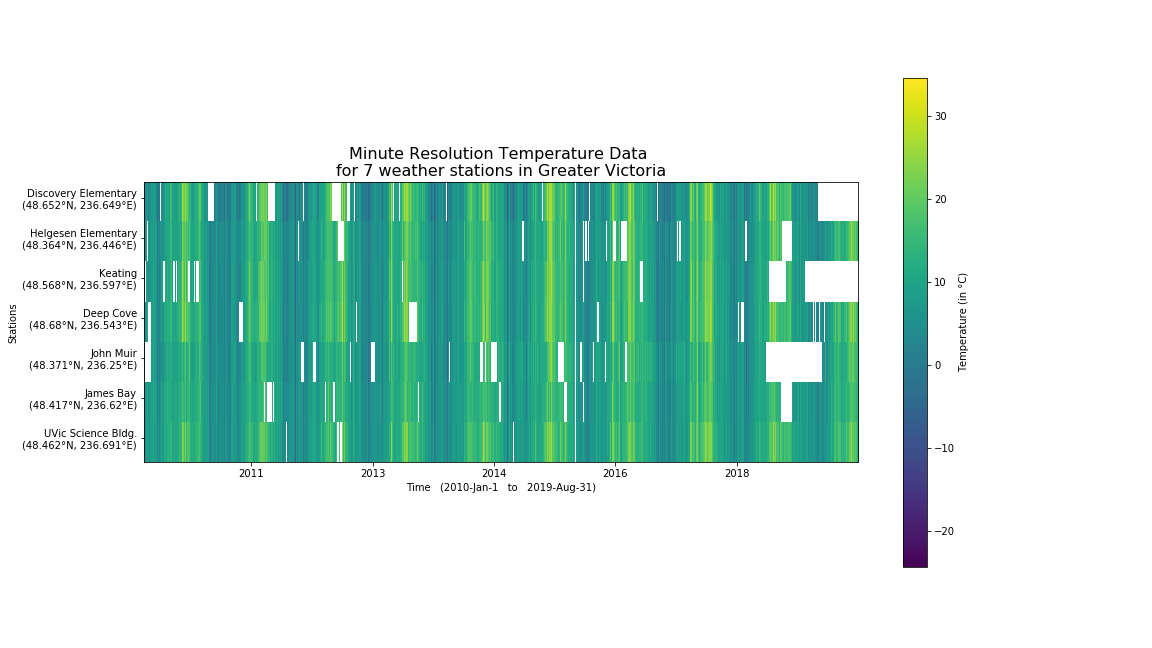

In [23]:
plt.close()
#Sets font size for all plots until specified otherwise
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=16)

plt.figure(figsize=(16, 9))
plt.imshow(all_min_stations, extent=(1, 1.3*40, 0, 0.5*40), interpolation='nearest', origin='lower', cmap='viridis')
plt.xticks(ticks=minxlocdate, labels=mindatelist)
plt.yticks(ticks=minylocname, labels=minnamelist)
plt.xlabel('Time   (2010-Jan-1   to   2019-Aug-31)')
plt.ylabel('Stations')
plt.title("Minute Resolution Temperature Data \nfor 7 weather stations in Greater Victoria")
cb = plt.colorbar()
cb.set_label("Temperature (in \u00B0C)")

In [24]:
plt.savefig("/home/jupyter/Phys-411-final-project/Images/RawMinData.eps")
plt.close()

Run code from here.

In [13]:
fs = 1/60 #Hz; Sampling frequency of minute resolution data
nyq = 0.5*fs #Hz; Nyquist frequency

In [14]:
uvic_sci_fn = sci.interp1d(min_times, uvic_sci_min)

In [15]:
james_bay_fn = sci.interp1d(min_times, james_bay_min)

In [16]:
john_muir_fn = sci.interp1d(min_times, john_muir_min)

In [17]:
deep_cove_fn = sci.interp1d(min_times, deep_cove_min)

In [18]:
keating_fn = sci.interp1d(min_times, keating_min)

In [19]:
helgesen_fn = sci.interp1d(min_times, helgesen_min)

In [20]:
discovery_elementary_fn = sci.interp1d(min_times, discovery_elementary_min)

From plot, we observe that data after December 2017 or so, ends up having many gaps in it for some of the stations (this is also true for hour resolution data. And the hour resolution data is really seedy pre-Summer 2011. So only doing analysis from 1-Jan-2012 till 31-Dec-2017.
Also, too many data points to analyze at once!
Hence going to split it into segments.
First, lets compare annual data.

In [44]:
datenum_17_1_1 = 736696.0 - 367.0
datenum_16_1_1 = datenum_17_1_1 - 366
datenum_15_1_1 = datenum_16_1_1 - 365
datenum_14_1_1 = datenum_15_1_1 - 365
datenum_13_1_1 = datenum_14_1_1 - 365
datenum_12_1_1 = datenum_13_1_1 - 366

In [45]:
yr2017 = np.linspace(datenum_17_1_1, datenum_17_1_1 + 365, 3600*24*365 + 1)
yr2016 = np.linspace(datenum_16_1_1, datenum_16_1_1 + 366, 3600*24*366 + 1)
yr2015 = np.linspace(datenum_15_1_1, datenum_15_1_1 + 365, 3600*24*365 + 1)
yr2014 = np.linspace(datenum_14_1_1, datenum_14_1_1 + 365, 3600*24*365 + 1)
yr2013 = np.linspace(datenum_13_1_1, datenum_13_1_1 + 365, 3600*24*365 + 1)
yr2012 = np.linspace(datenum_12_1_1, datenum_12_1_1 + 366, 3600*24*366 + 1)

In [ ]:
f_us_17, PSD_us_17 = signal.welch(uvic_sci_fn(yr2017), fs, 'flattop', len(yr2017), scaling='spectrum')

<IPython.core.display.Javascript object>


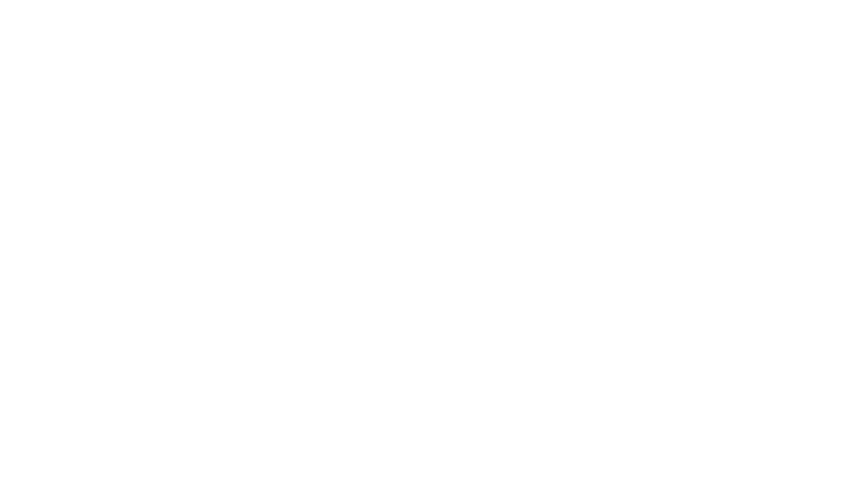

NameError: name 'f_us_17' is not defined

In [46]:
plt.close()

plt.figure(figsize=(12, 7))
plt.plot(f_us_17*1e6, PSD_us_17, 'r-', label="UVic Science Building 2017")
plt.grid(True)
plt.xlabel("Frequency domain, f:*10^(-6) Hz")
#plt.xlim(-0.5, 20)
plt.ylabel("Power, X(f): (W)")
plt.legend()